# Nicholas Cage Filmography

The focus of this notebook is to perform EDA on the IMDB dataset and Data Exploration before building a dashbaord

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Read the IMDb CSV file
data = pd.read_csv('dataset/imdb-movies-dataset.csv')

data.columns


Index(['Poster', 'Title', 'Year', 'Certificate', 'Duration (min)', 'Genre',
       'Rating', 'Metascore', 'Director', 'Cast', 'Votes', 'Description',
       'Review Count', 'Review Title', 'Review'],
      dtype='object')

## Focus on Nicolas Cage
We are only concerned with movies in which Nicholas was casted, therefore we filter it

In [45]:
filtered_data = data[data['Cast'].notna() & data['Cast'].str.contains('Nicolas Cage')]
filtered_data.shape[0]

74

## Plot the missing values matrix

<AxesSubplot: >

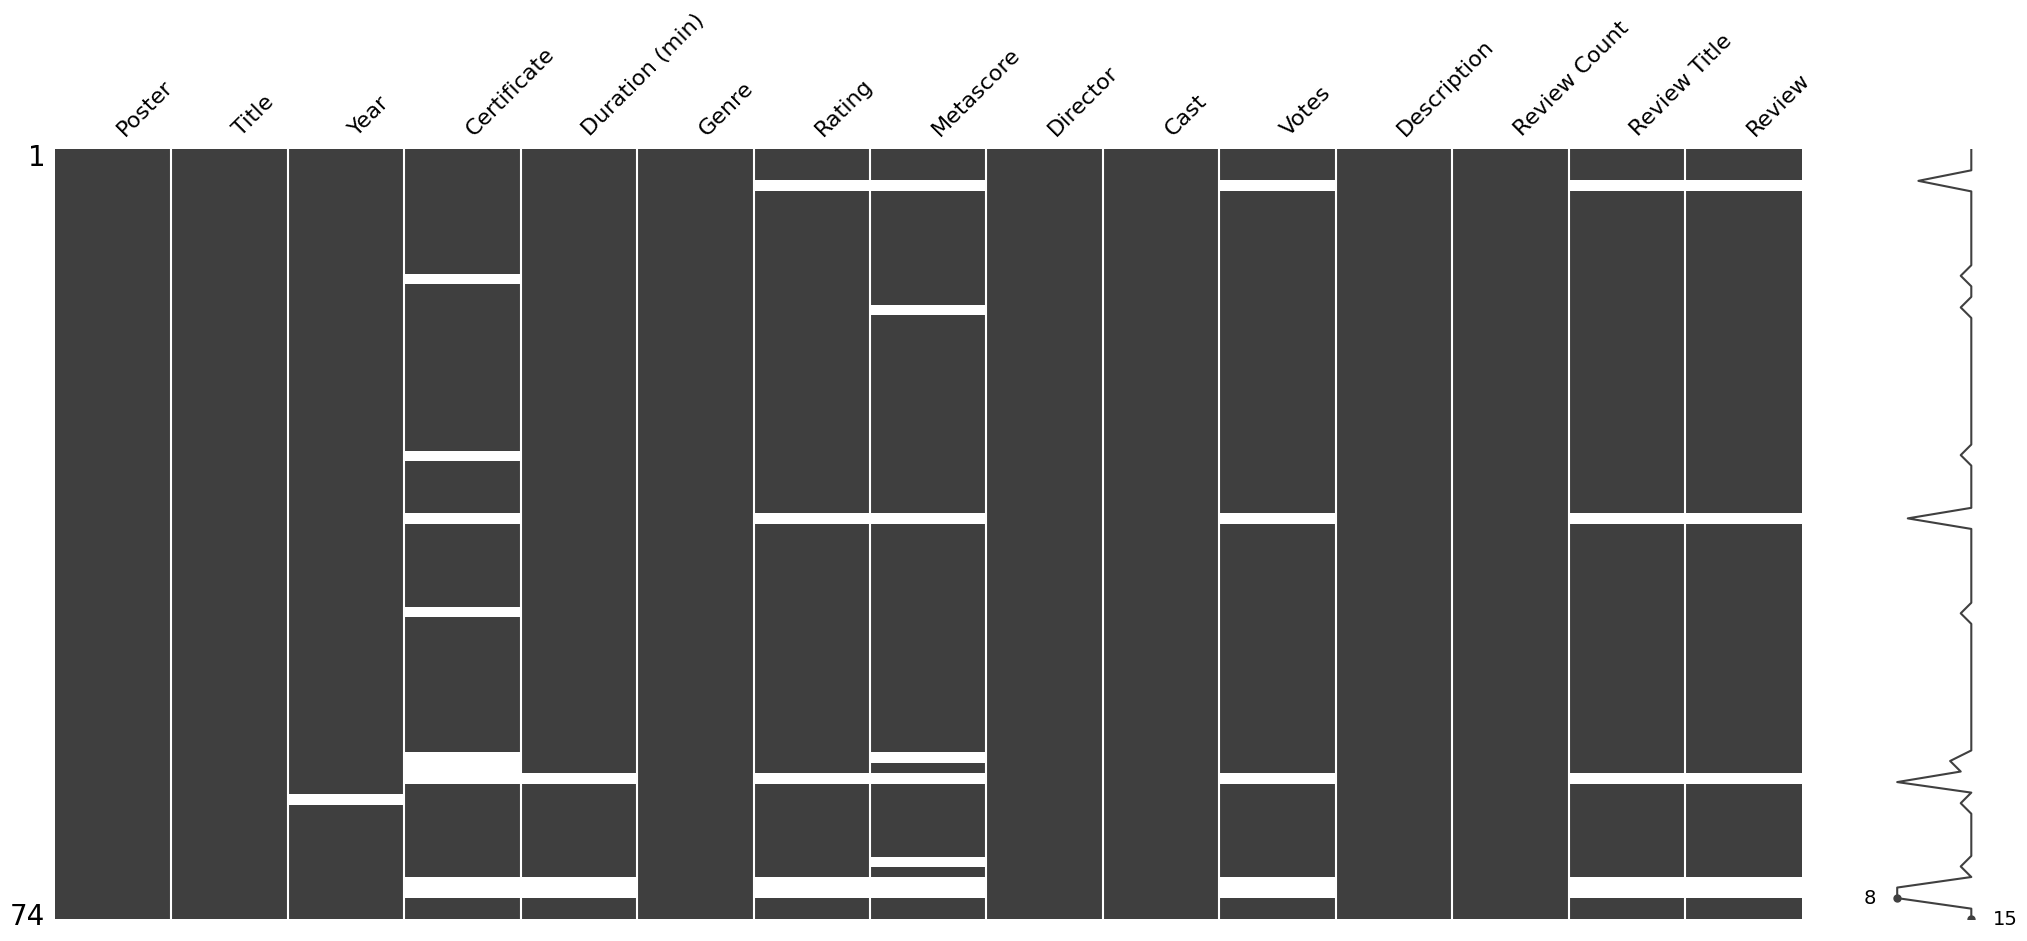

In [46]:
msno.matrix(filtered_data)

In [47]:
null_counts = filtered_data.isnull().sum()
print(null_counts)

Poster            0
Title             0
Year              1
Certificate       9
Duration (min)    3
Genre             0
Rating            5
Metascore         8
Director          0
Cast              0
Votes             5
Description       0
Review Count      0
Review Title      5
Review            5
dtype: int64


## Drop Certificate column
Because the certificate column has more nulls, which would lead to deleting the whole movie, and since we don't need certificate therefore we delete this column before dropping NA to reduce amount of information loss.

In [51]:
filtered_data = filtered_data.drop('Certificate', axis=1)

Normally, we could perform data enrichement in Excel from Generative AI to collect possible information e.g. the year from web. But given the scope of the task, and the less amount of Null values in Nicolas Cage's data. We can simply drop the rows will nulls.

Let's make sure everything is intact by replotting after dropping null values

<AxesSubplot: >

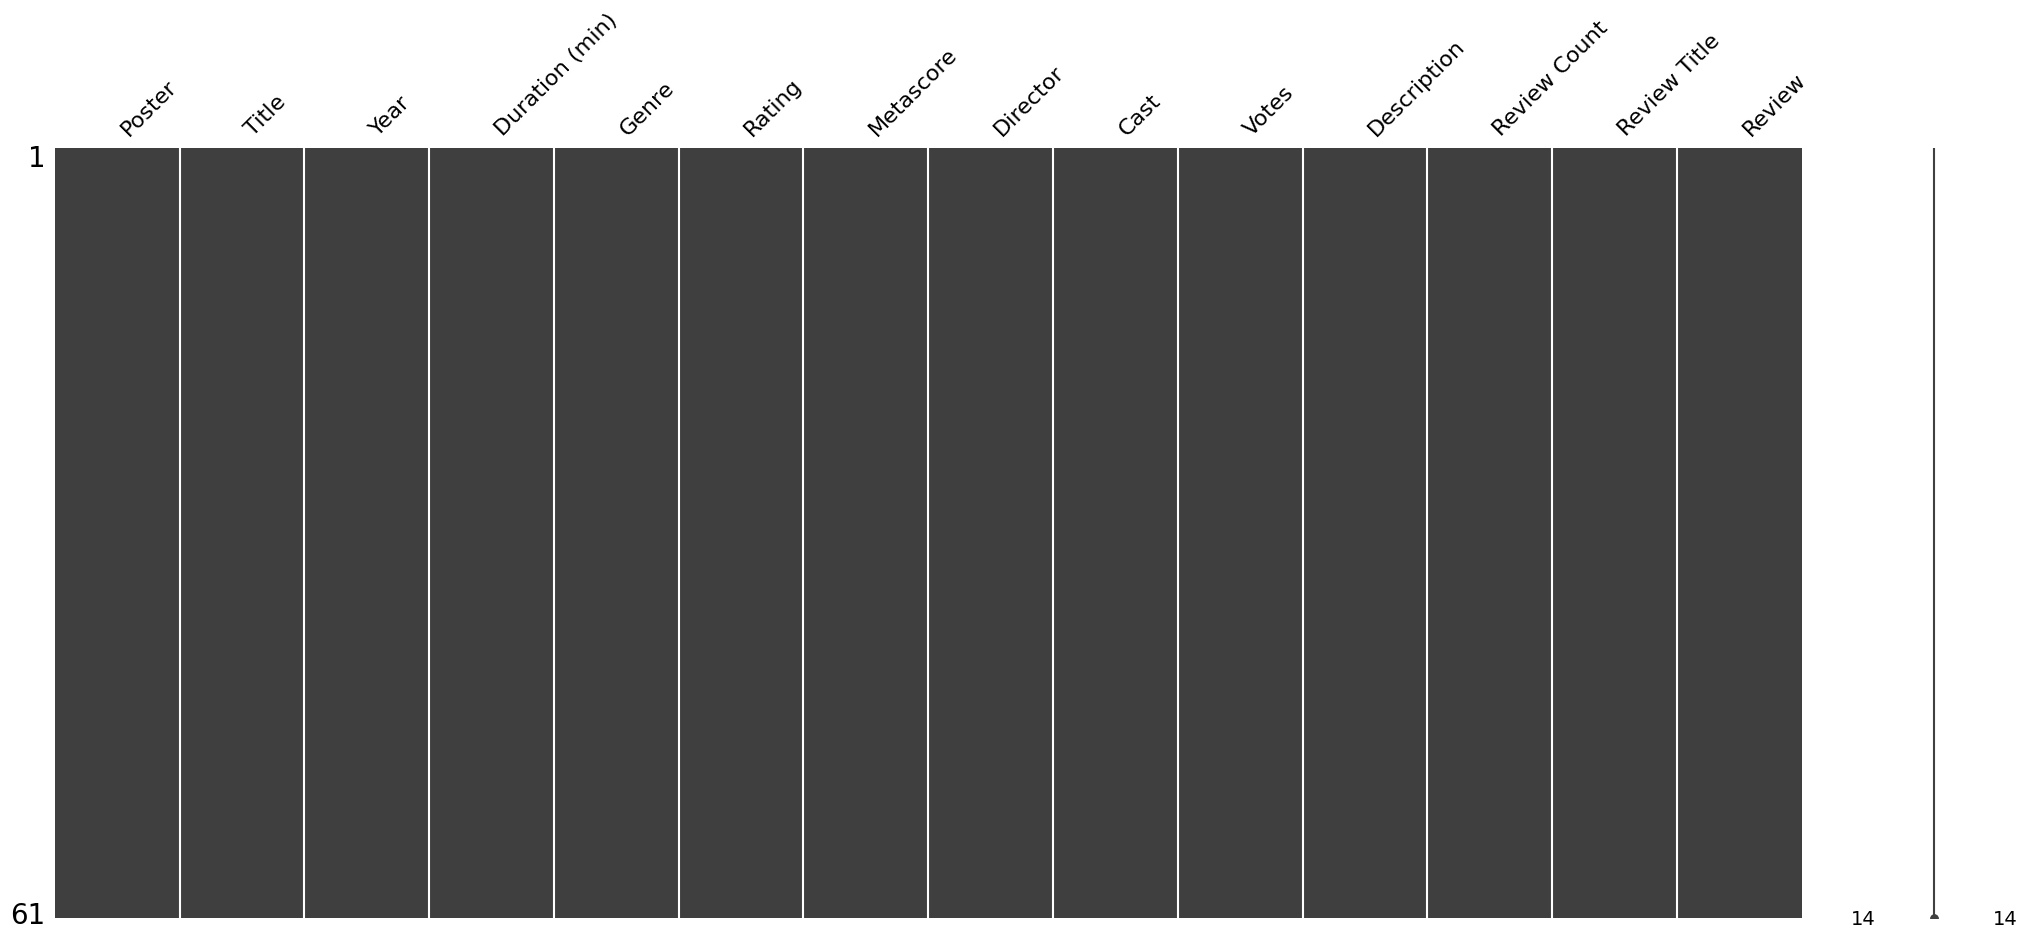

In [53]:
filtered_data = filtered_data.dropna()
msno.matrix(filtered_data)

In [54]:
print(filtered_data['Genre'])

28          Action, Horror, Thriller
151           Comedy, Drama, Fantasy
301          Action, Fantasy, Horror
650            Action, Comedy, Crime
684            Action, Comedy, Crime
                    ...             
9151         Action, Crime, Thriller
9186    Animation, Adventure, Comedy
9315          Action, Crime, Mystery
9595          Crime, Drama, Thriller
9871        Biography, Comedy, Crime
Name: Genre, Length: 61, dtype: object


Let us flatten the multi-valued cells to allow for easy data analysis

In [55]:
filtered_data['Genre'] = filtered_data['Genre'].str.split(', ')
filtered_data['Cast'] = filtered_data['Cast'].str.split(', ')
filtered_data = filtered_data.explode('Genre')
filtered_data = filtered_data.reset_index(drop=True)
filtered_data = filtered_data.explode('Cast')
filtered_data = filtered_data.reset_index(drop=True)

Since the dataset is all about Nicolas Cage including him in the cast is redundant since he's already involved implicitly

In [56]:
filtered_data = filtered_data[filtered_data['Cast'] != 'Nicolas Cage']
filtered_data.head()

,Poster,Title,Year,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
1,https://m.media-amazon.com/images/M/MV5BMDI1ZT...,Arcadian,2023.0,92.0,Action,5.5,60.0,Benjamin Brewer,Jaeden Martell,"6,989",A father and his twin teenage sons fight to su...,61,"There is no mode - ""stabilization""",The story of a father and two teenagers in a p...
2,https://m.media-amazon.com/images/M/MV5BMDI1ZT...,Arcadian,2023.0,92.0,Action,5.5,60.0,Benjamin Brewer,Maxwell Jenkins,"6,989",A father and his twin teenage sons fight to su...,61,"There is no mode - ""stabilization""",The story of a father and two teenagers in a p...
3,https://m.media-amazon.com/images/M/MV5BMDI1ZT...,Arcadian,2023.0,92.0,Action,5.5,60.0,Benjamin Brewer,Sadie Soverall,"6,989",A father and his twin teenage sons fight to su...,61,"There is no mode - ""stabilization""",The story of a father and two teenagers in a p...
5,https://m.media-amazon.com/images/M/MV5BMDI1ZT...,Arcadian,2023.0,92.0,Horror,5.5,60.0,Benjamin Brewer,Jaeden Martell,"6,989",A father and his twin teenage sons fight to su...,61,"There is no mode - ""stabilization""",The story of a father and two teenagers in a p...
6,https://m.media-amazon.com/images/M/MV5BMDI1ZT...,Arcadian,2023.0,92.0,Horror,5.5,60.0,Benjamin Brewer,Maxwell Jenkins,"6,989",A father and his twin teenage sons fight to su...,61,"There is no mode - ""stabilization""",The story of a father and two teenagers in a p...


In [40]:
df_unique = filtered_data.drop_duplicates(subset='Title')
print(df_unique['Director'].value_counts())

Jon Turteltaub          3
Dominic Sena            2
Joel Schumacher         2
John Woo                2
Simon West              2
Benjamin Brewer         1
Andrew Bergman          1
Martin Scorsese         1
Francis Ford Coppola    1
Brett Donowho           1
Alan Parker             1
Ridley Scott            1
Vic Armstrong           1
Joel Crawford           1
Neil LaBute             1
David Gordon Green      1
Werner Herzog           1
Mario Van Peebles       1
Brian De Palma          1
Brian Taylor            1
Oliver Stone            1
David Bowers            1
John Madden             1
Jason Cabell            1
Gore Verbinski          1
Dimitri Logothetis      1
John A. Davis           1
Alex Brewer             1
John Dahl               1
Lee Tamahori            1
Mark Neveldine          1
Brad Silberling         1
Kirk DeMicco            1
Panos Cosmatos          1
Tom Gormican            1
Matthew Vaughn          1
Michael Bay             1
Chris McKay             1
Mark Steven 

In [42]:
df_unique['Genre'].value_counts()

Action       26
Comedy       10
Crime         9
Drama         7
Animation     4
Biography     2
Horror        2
Adventure     1
Name: Genre, dtype: int64

<AxesSubplot: xlabel='Title'>

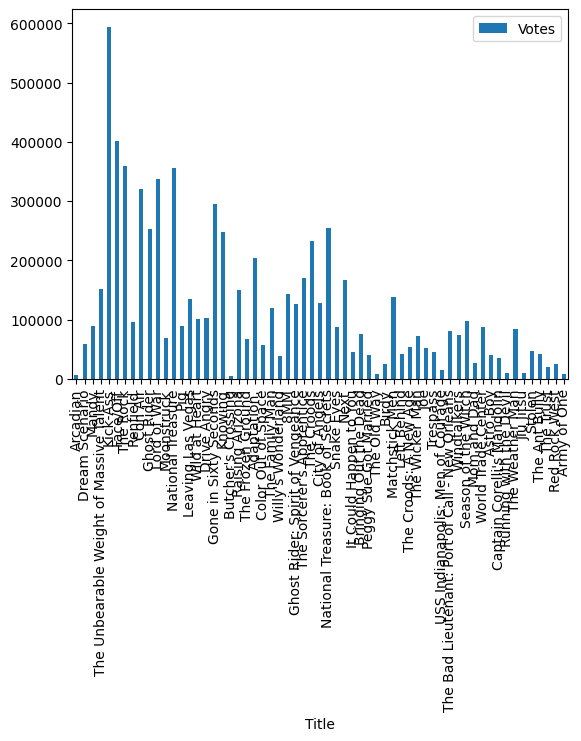

In [60]:
df_unique['Votes'] = df_unique['Votes'].str.replace(',', '').astype(int)
df_unique.plot(x='Title', y='Votes', kind='bar')

C:\Users\Mirwi\AppData\Local\Temp\ipykernel_10968\4012003547.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_unique.corr()


<AxesSubplot: >

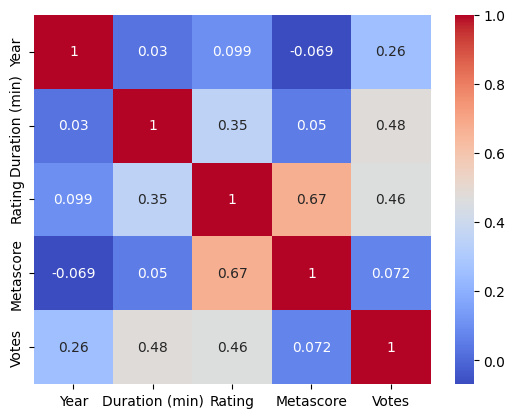

In [61]:
import seaborn as sns

correlation_matrix = df_unique.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [35]:
filtered_data.shape[0]

536

In [58]:
filtered_data.to_csv('dataset/nicholas_data2.csv', index=False)